In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [525]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [527]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [528]:
df["age"].isnull().sum()

np.int64(0)

In [529]:
df["children"].isnull().sum()
df["bmi"].isnull().sum()
df["expenses"].isnull().sum()

np.int64(0)

In [530]:
Q1 = df['expenses'].quantile(0.25)
Q3 = df['expenses'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["expenses"] < lower) | (df["expenses"] > upper)]
outliers.shape


Q1: 4740.2875
Q3: 16639.915
IQR: 11899.6275
Lower Bound: -13109.15375
Upper Bound: 34489.35625


(139, 7)

In [531]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["age"] < lower) | (df["age"] > upper)]
outliers.shape

Q1: 27.0
Q3: 51.0
IQR: 24.0
Lower Bound: -9.0
Upper Bound: 87.0


(0, 7)

In [532]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["bmi"] < lower) | (df["bmi"] > upper)]
outliers.shape

Q1: 26.3
Q3: 34.7
IQR: 8.400000000000002
Lower Bound: 13.699999999999998
Upper Bound: 47.300000000000004


(9, 7)

In [533]:
Q1 = df['children'].quantile(0.25)
Q3 = df['children'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["children"] < lower) | (df["children"] > upper)]
outliers.shape

Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0


(0, 7)

In [534]:
x = df['bmi']
y = df['expenses']


In [535]:
x_mean = x.mean()
y_mean = y.mean()

print("Mean of BMI:", x_mean)
print("Mean of Expenses:", y_mean)


Mean of BMI: 30.66547085201794
Mean of Expenses: 13270.422414050823


In [536]:
num_cols = ['age', 'bmi', 'children', 'expenses']

In [537]:


def pearson_manual(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = ((x - x_mean) * (y - y_mean)).sum()
    denominator = np.sqrt(((x - x_mean)**2).sum() * ((y - y_mean)**2).sum())

    return numerator / denominator



In [538]:
corr_matrix_manual = pd.DataFrame(
    index=num_cols,
    columns=num_cols,
    dtype=float
)



In [539]:
for col1 in num_cols:
    for col2 in num_cols:
        corr_matrix_manual.loc[col1, col2] = pearson_manual(
            df[col1], df[col2]
        )


In [540]:
corr_matrix_manual

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [541]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


               age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000


In [542]:
df[['age','bmi','children']].corr()


,age,bmi,children
age,1.000000,0.109341,0.042469
bmi,0.109341,1.000000,0.012645
children,0.042469,0.012645,1.000000


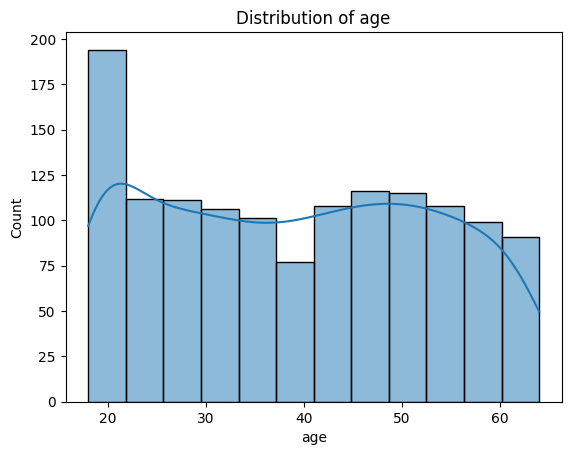

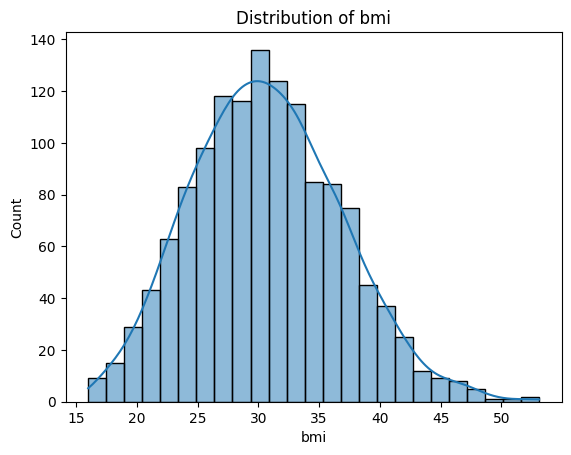

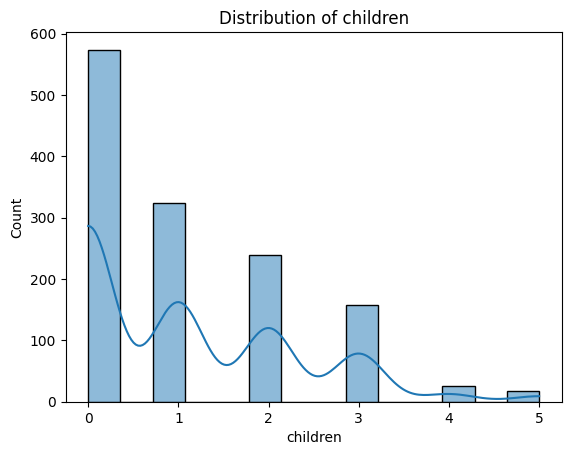

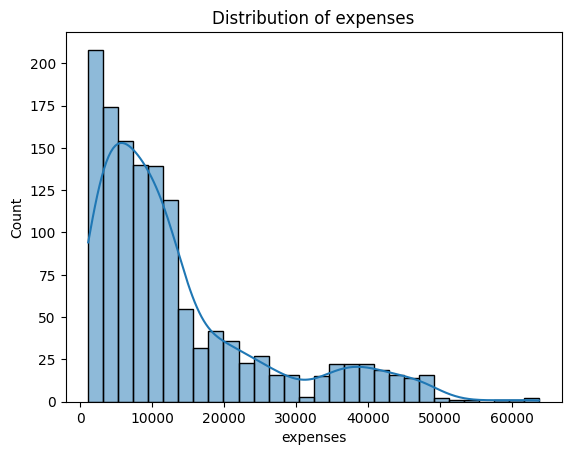

In [543]:


for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


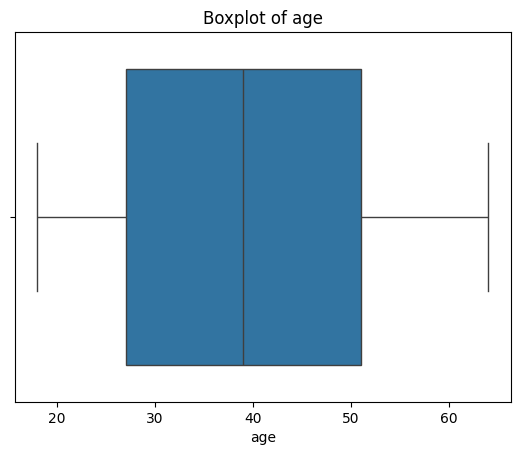

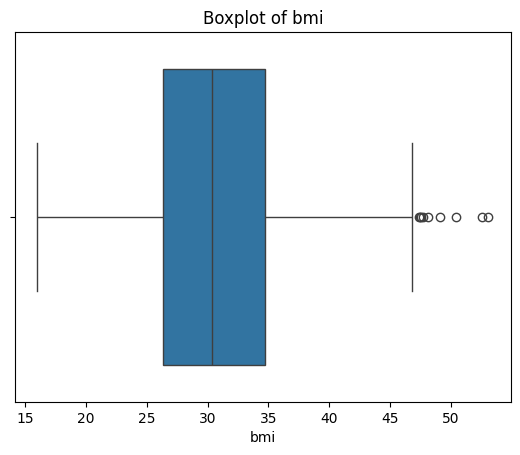

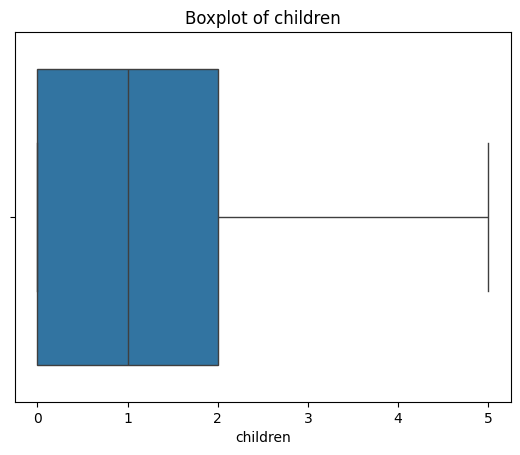

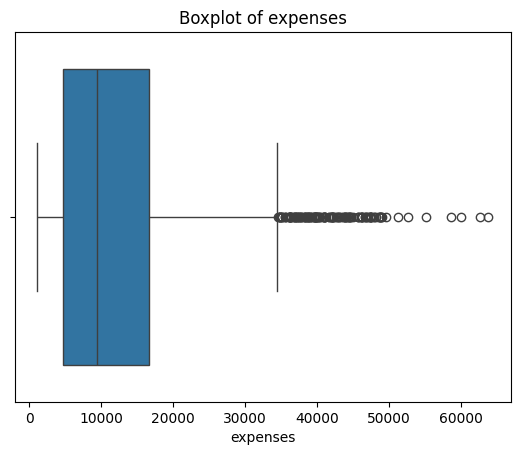

In [544]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


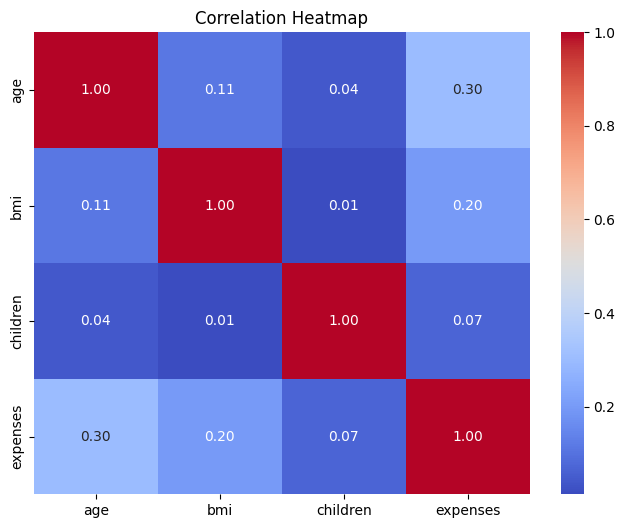

In [545]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_manual, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## PART B


In [546]:
x = df['bmi']
y = df['expenses']

x_mean = x.mean()
y_mean = y.mean()

beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
beta_0 = y_mean - beta_1 * x_mean

beta_0, beta_1


(np.float64(1178.1795457392473), np.float64(394.32764383971124))

# plotting regression line



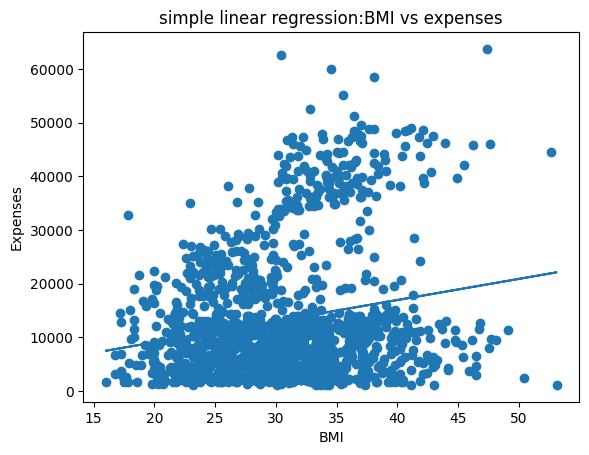

In [547]:
y_pred=beta_0+beta_1*x
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.title("simple linear regression:BMI vs expenses")
plt.show()

## evaluation metrics


In [548]:
errors=y-y_pred
squared_errors=errors**2
mse=np.mean(squared_errors)
print("mean Squared error(MSE):",mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

mean Squared error(MSE): 140764214.66568008
RMSE: 11864.40957931241


In [549]:
y_mean = np.mean(y)
SS_tot = np.sum((y - y_mean)**2)
SS_res = np.sum((y - y_pred)**2)
R2 = 1 - (SS_res / SS_tot)
print("Manual R^2:", R2)

Manual R^2: 0.03943252905734407


this mean EMI alone cannot define the expenses it is defining only 3.9 percent.
other 96.1% expenses is defined by other factors.so it is not a good fit.